In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [3]:

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (25000, 500)
Test data shape: (25000, 500)


In [4]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=500))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 764s 2s/step - accuracy: 0.7205 - loss: 0.5401 - val_accuracy: 0.8362 - val_loss: 0.3914
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 792s 2s/step - accuracy: 0.8490 - loss: 0.3593 - val_accuracy: 0.8402 - val_loss: 0.3821
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - accuracy: 0.8697 - loss: 0.3159 - val_accuracy: 0.8500 - val_loss: 0.3654
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 794s 2s/step - accuracy: 0.8824 - loss: 0.2909 - val_accuracy: 0.8486 - val_loss: 0.3697
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 778s 2s/step - accuracy: 0.9085 - loss: 0.2358 - val_accuracy: 0.8509 - val_loss: 0.3821



Test Accuracy: 85.09%


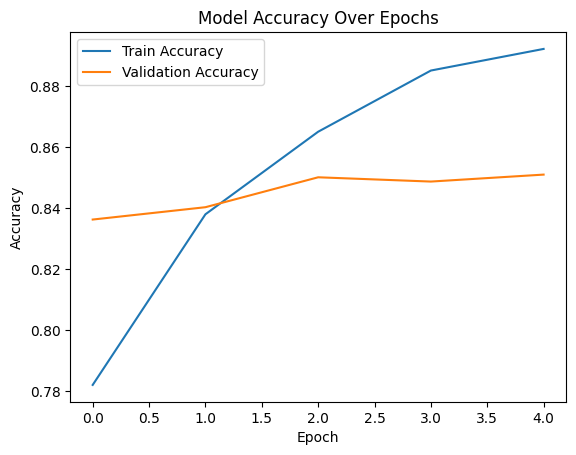

In [7]:


score, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc * 100:.2f}%")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()